## Loading in Data

Pandas are usefull for read, write & manipulate the data
we will learn 
1. Read/write CSV
2. Dataframes
3. selecting  rows & columns
4. apply() function
5. plotting

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sbux.csv')

In [3]:
# using the URL directly works too!
# df = pd.read_csv('https://drive.google.com/file/d/1pnZH5oYeajVkJnMc7YR3TLrAWW07tmfb/view?usp=sharing/sbux.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,date,open,high,low,close,volume,Name
0,08-02-2013,27.920,28.325,27.920,28.185,7146296,SBUX
1,11-02-2013,28.260,28.260,27.930,28.070,5457354,SBUX
2,12-02-2013,28.000,28.275,27.975,28.130,8665592,SBUX
3,13-02-2013,28.230,28.230,27.750,27.915,7022056,SBUX
4,14-02-2013,27.765,27.905,27.675,27.775,8899188,SBUX


In [6]:
df.head(10)

,date,open,high,low,close,volume,Name
0,08-02-2013,27.920,28.325,27.920,28.185,7146296,SBUX
1,11-02-2013,28.260,28.260,27.930,28.070,5457354,SBUX
2,12-02-2013,28.000,28.275,27.975,28.130,8665592,SBUX
3,13-02-2013,28.230,28.230,27.750,27.915,7022056,SBUX
4,14-02-2013,27.765,27.905,27.675,27.775,8899188,SBUX
5,15-02-2013,27.805,27.850,27.085,27.170,18195730,SBUX
6,19-02-2013,27.180,27.305,27.010,27.225,11760912,SBUX
7,20-02-2013,27.300,27.420,26.590,26.655,12472506,SBUX
8,21-02-2013,26.535,26.820,26.260,26.675,13896450,SBUX
9,22-02-2013,26.850,27.105,26.640,27.085,11487316,SBUX


In [7]:
df.tail()

,date,open,high,low,close,volume,Name
1254,01-02-2018,56.280,56.42,55.89,56.00,14690146,SBUX
1255,02-02-2018,55.900,56.32,55.70,55.77,15358909,SBUX
1256,05-02-2018,55.530,56.26,54.57,54.69,16059955,SBUX
1257,06-02-2018,53.685,56.06,53.56,55.61,17415065,SBUX
1258,07-02-2018,55.080,55.43,54.44,54.46,13927022,SBUX


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


## Selecting Rows and Columns

In [9]:
df[0,0] # doesn't work

KeyError: (0, 0)

In [10]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [11]:
# columns can be assigned
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'name']

In [12]:
df['open']

0       27.920
1       28.260
2       28.000
3       28.230
4       27.765
         ...  
1254    56.280
1255    55.900
1256    55.530
1257    53.685
1258    55.080
Name: open, Length: 1259, dtype: float64

In [13]:
# how to select row in dataframe
df.iloc[0]

date      08-02-2013
open           27.92
high          28.325
low            27.92
close         28.185
volume       7146296
name            SBUX
Name: 0, dtype: object

In [14]:
df.loc[0]
# so what is the diffrnec= 
#iloc=used for integer indices 
#loc = selects the row by the index label

date      08-02-2013
open           27.92
high          28.325
low            27.92
close         28.185
volume       7146296
name            SBUX
Name: 0, dtype: object

In [15]:
df2 = pd.read_csv('sbux.csv', index_col='date')

In [16]:
df2.head()

,open,high,low,close,volume,Name
date,,,,,,
08-02-2013,27.920,28.325,27.920,28.185,7146296,SBUX
11-02-2013,28.260,28.260,27.930,28.070,5457354,SBUX
12-02-2013,28.000,28.275,27.975,28.130,8665592,SBUX
13-02-2013,28.230,28.230,27.750,27.915,7022056,SBUX
14-02-2013,27.765,27.905,27.675,27.775,8899188,SBUX


In [17]:
df2.loc['08-02-2013']

open        27.92
high       28.325
low         27.92
close      28.185
volume    7146296
Name         SBUX
Name: 08-02-2013, dtype: object

In [18]:
type(df2.loc['08-02-2013'])

pandas.core.series.Series

In [19]:
df[df['open'] > 64]

,date,open,high,low,close,volume,name
1087,05-06-2017,64.85,64.870,64.18,64.27,6809284,SBUX
1088,06-06-2017,64.22,64.350,64.05,64.16,5448439,SBUX
1089,07-06-2017,64.13,64.295,63.34,63.50,8364994,SBUX


In [20]:
df[df['name'] != 'SBUX']

,date,open,high,low,close,volume,name


In [21]:
# don't want "objects" when we're doing math!
df.values

array([['08-02-2013', 27.92, 28.325, ..., 28.185, 7146296, 'SBUX'],
       ['11-02-2013', 28.26, 28.26, ..., 28.07, 5457354, 'SBUX'],
       ['12-02-2013', 28.0, 28.275, ..., 28.13, 8665592, 'SBUX'],
       ...,
       ['05-02-2018', 55.53, 56.26, ..., 54.69, 16059955, 'SBUX'],
       ['06-02-2018', 53.685, 56.06, ..., 55.61, 17415065, 'SBUX'],
       ['07-02-2018', 55.08, 55.43, ..., 54.46, 13927022, 'SBUX']],
      dtype=object)

In [22]:
A = df[['open', 'close']].values
A

array([[27.92 , 28.185],
       [28.26 , 28.07 ],
       [28.   , 28.13 ],
       ...,
       [55.53 , 54.69 ],
       [53.685, 55.61 ],
       [55.08 , 54.46 ]])

In [23]:
type(A)

numpy.ndarray

In [24]:
# write a dataframe to file
smalldf = df[['open', 'close']]
smalldf.to_csv('output.csv')

In [25]:
smalldf.head()

,open,close
0,27.920,28.185
1,28.260,28.070
2,28.000,28.130
3,28.230,27.915
4,27.765,27.775


## Plotting with Pandas

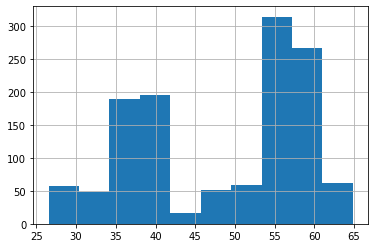

In [26]:
df['open'].hist();

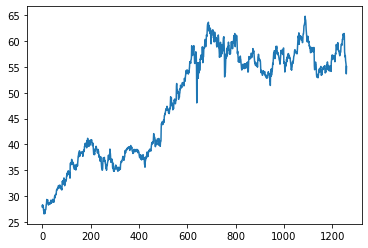

In [27]:
df['open'].plot();

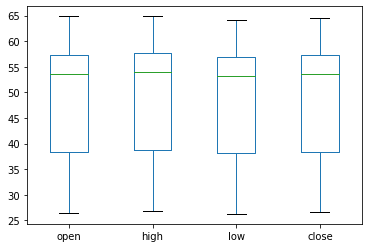

In [28]:
df[['open', 'high', 'low', 'close']].plot.box();

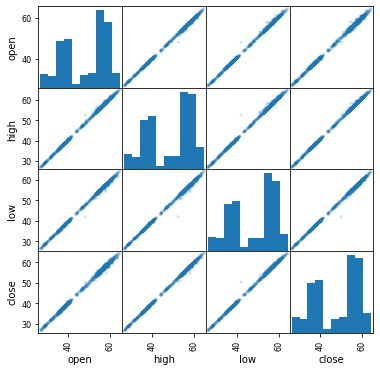

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['open', 'high', 'low', 'close']],
               alpha=0.2, figsize=(6, 6));